# Zero to Hero

## 1.07 Aplicando el arbol

Se aplicará el modelo generado por rpart a los datos nuevos y se genera la salida para Kaggle

In [1]:
rm(list = ls())
gc()

library("data.table") # cargo la libreria  data.table
library("rpart") # cargo la libreria  rpart
library("rpart.plot")

options(repr.plot.width = 20, repr.plot.height = 10)
setwd("~/buckets/b1/")


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,632507,33.8,1409324,75.3,1014962,54.3
Vcells,1171366,9.0,8388608,64.0,1815612,13.9


In [2]:
dataset <- fread("./datasets/dataset_pequeno.csv") # cargo el dataset #cargo el dataset


In [3]:
dtrain <- dataset[foto_mes == 202107]
dapply <- dataset[foto_mes == 202109]


In [4]:
# genero el modelo
modelo <- rpart::rpart(
    formula = "clase_ternaria ~ .",
    data = dtrain,
    xval = 0,
    cp = -1,
    maxdepth = 2
)


Aplico el modelo a los datos dapply  pidiendo que me devuelva probabildades

In [5]:
prediccion <- predict(modelo, dapply, type = "prob")


Analizo que queda en prediccion

In [6]:
head(prediccion)


,BAJA+1,BAJA+2,CONTINUA
1,0.00225795,0.002989693,0.9947524
2,0.00225795,0.002989693,0.9947524
3,0.02345092,0.023781213,0.9527679
4,0.00225795,0.002989693,0.9947524
5,0.00225795,0.002989693,0.9947524
6,0.00225795,0.002989693,0.9947524


Prediccion es una matriz; me interesa la columna "BAJA+2"  que es la probabilidad que modelo asigna a cada registro de dapply

In [7]:
prob_baja2 <- prediccion[, "BAJA+2"]


In [8]:
head(prob_baja2)


1           2           3           4           5           6 
0.002989693 0.002989693 0.023781213 0.002989693 0.002989693 0.002989693

prob_baja2 es el vector de probabilidades

In [9]:
length(prob_baja2)
nrow(dapply)


[1] 165093

[1] 165093

Ahora decido si envio el estimulo o no
<br>
si prob( BAJA+2) > 0.025  envio  el estímulo

In [11]:
Predicted <- ifelse(prob_baja2 > 0.025, 1, 0)


In [12]:
head(Predicted)


1 2 3 4 5 6 
0 0 0 0 0 0

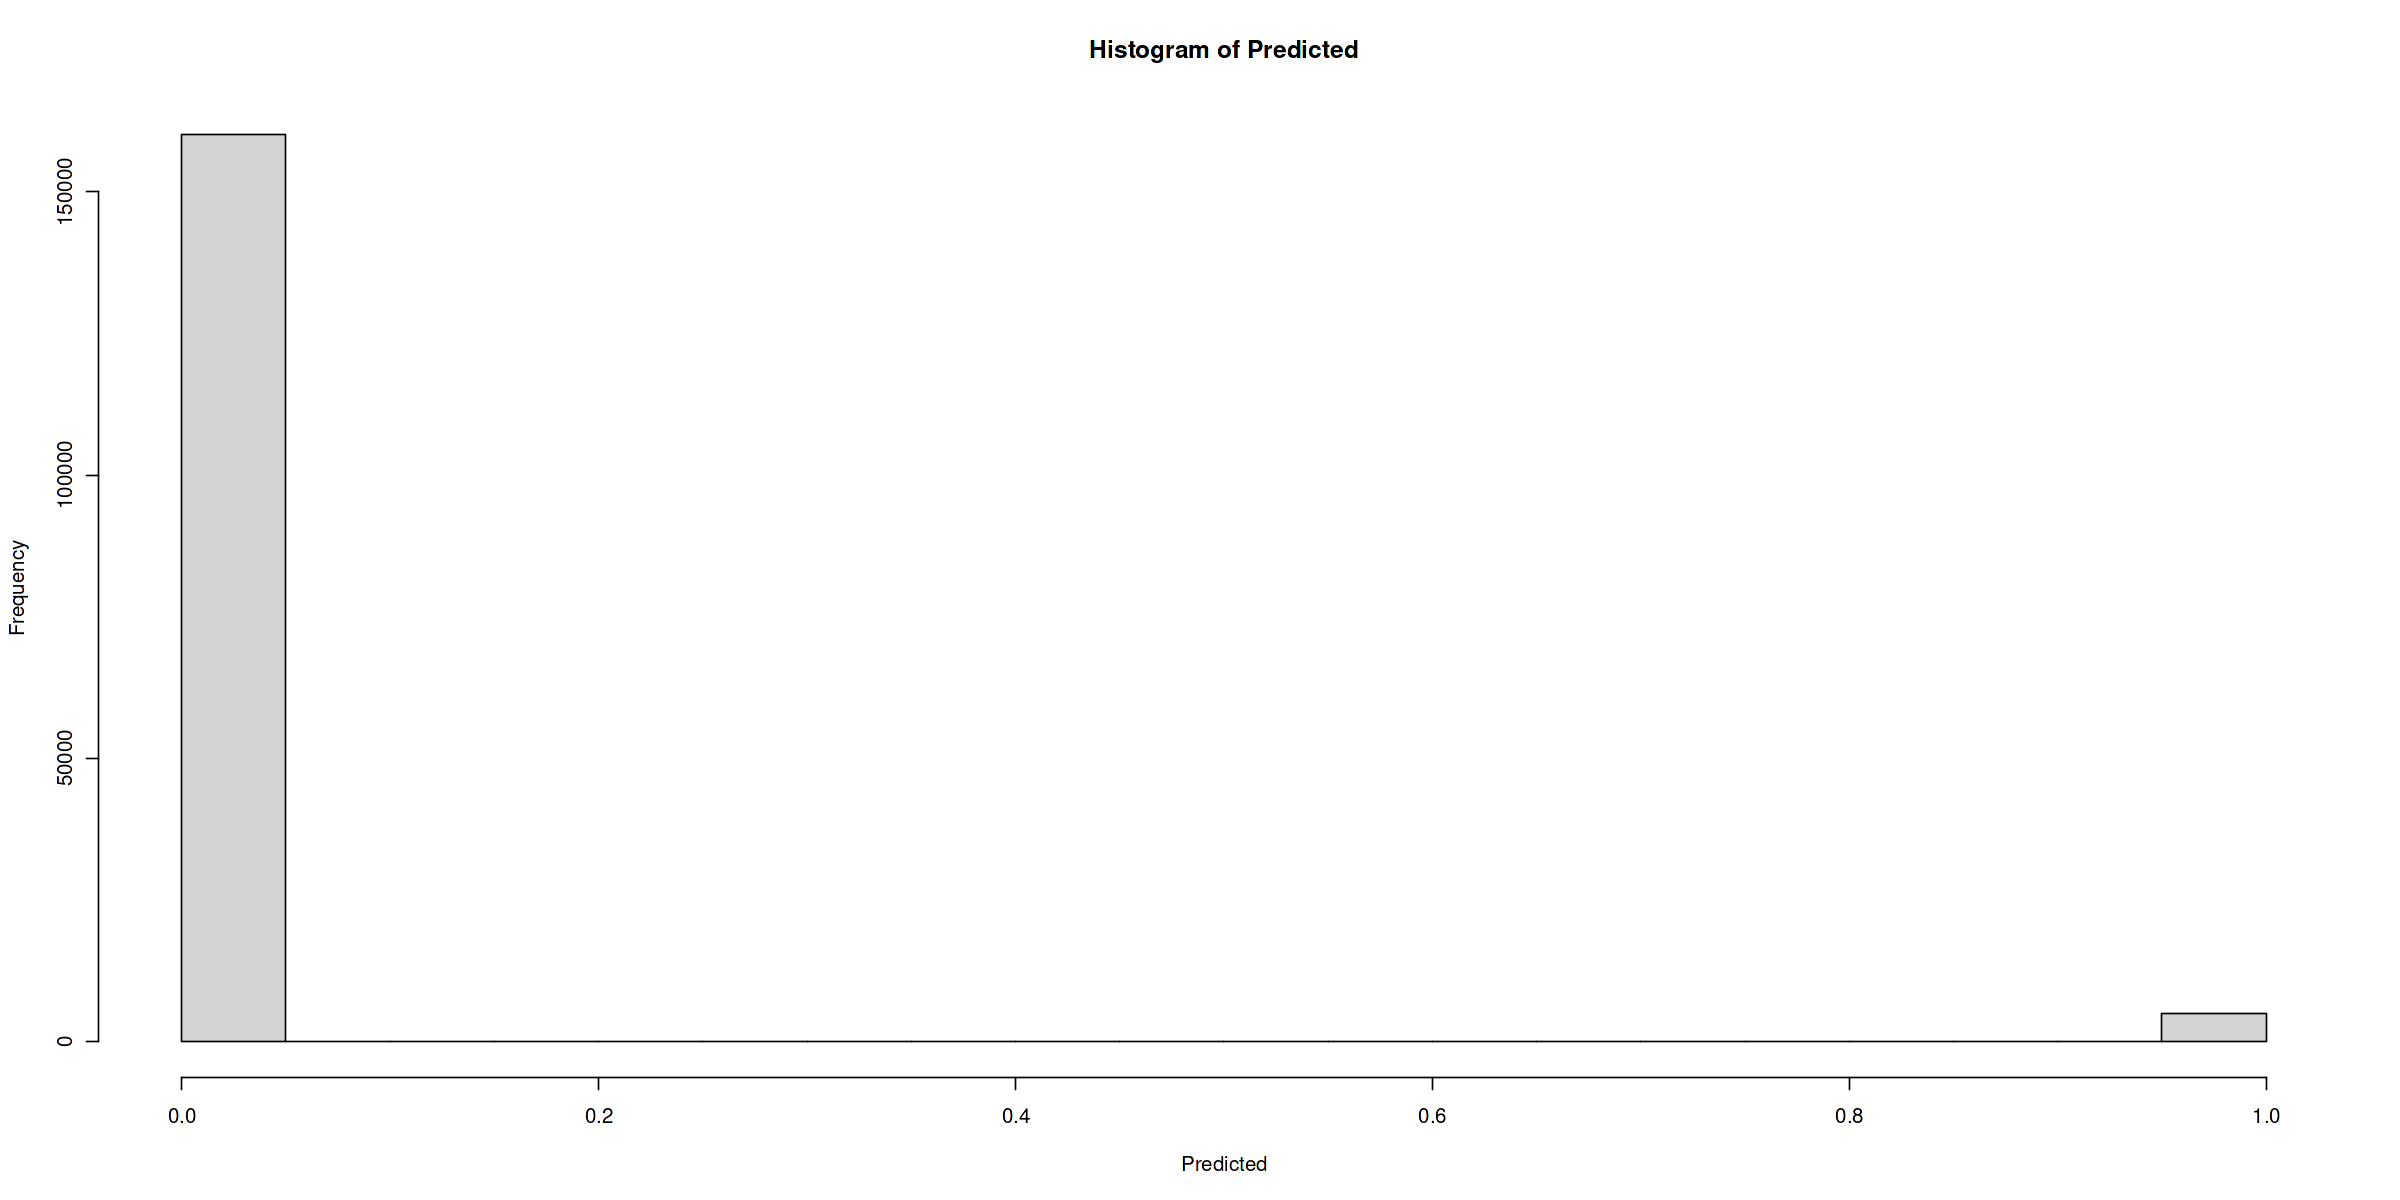

In [13]:
hist(Predicted)


creo una tabla con  lo que voy a enviar a Kaggle

In [14]:
entrega <- as.data.table(list("numero_de_cliente" = dapply$numero_de_cliente, "Predicted" = Predicted))


In [15]:
head(entrega)


numero_de_cliente,Predicted
<int>,<dbl>
29183733,0
29184468,0
29185245,0
29186441,0
29186475,0
29187730,0


In [16]:
entrega[, .N, Predicted]


Predicted,N
<dbl>,<int>
0,160114
1,4979


Esto significa que se enviaran 4979 estímulos

In [ ]:
# genero el archivo para Kaggle
# creo la carpeta donde va el experimento
#dir.create("./exp/", showWarnings = FALSE)
dir.create("./exp/ZH2017/", showWarnings = FALSE)

fwrite(entrega,
        file = "./exp/ZH2017/para_Kaggle_0107.csv",
        sep = ","
)
